# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
dataf = pd.read_csv(r"E:\python notes\Stats and ML\dataset\water_potability.csv")

In [ ]:
dataf.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
dataf.shape

(3276, 10)

# Checking duplicates in data

In [ ]:
dataf.duplicated().sum()

0

- There are no duplicates in the data

In [ ]:
# Checking the data statistics

In [ ]:
dataf.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# checking data in the columns

In [ ]:
for i in dataf.columns:
    print("*****************************",i,"***************************************")
    print()
    print(set(dataf[i].tolist()))
    print()

***************************** ph ***************************************

{0.0, 1.844538366498842, 2.974429410478532, 3.902475685915096, 3.41035967073924, 5.584086638456089, 5.9102517293372046, 7.49623220797336, 8.099124189298397, 8.316765884214679, 10.223862164528772, 11.180284470721592, 9.181560007151536, 10.43329098280438, 11.180694664461903, 7.966856823982582, 8.390500571895505, 8.526169869777789, 9.177869865892433, 10.356118827208377, 11.301793996392291, 4.865069696444607, 4.574124682109073, 5.596729817575806, 5.271971377729756, 5.057736411358974, 6.511618075241813, 6.87645104288265, 6.848329601322462, nan, 6.584839333204741, 7.1830959315085465, 7.05994023445362, 6.380717315013499, 6.155249161058691, 7.159052990497457, 8.860450853927205, 8.082657125491437, 8.552782415873253, 8.127710424418524, 8.543216836760848, 9.61022034489963, 8.115624506544236, 9.638222268227196, 10.316400384553162, nan, 10.848130421433211, 10.893484732796878, 7.274212566762742, 6.195254905476403, 6.7025465531

# Checking for missing values

In [ ]:
dataf.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
dataf.isna().sum()/len(dataf) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

- We can see missing data in the features 'ph','Sulfate', 'Trihalomethanes' so we need to impute them. Before we impute values in these we check if there are outliers in the columns so that we can decide if we need to impute with mean or median values

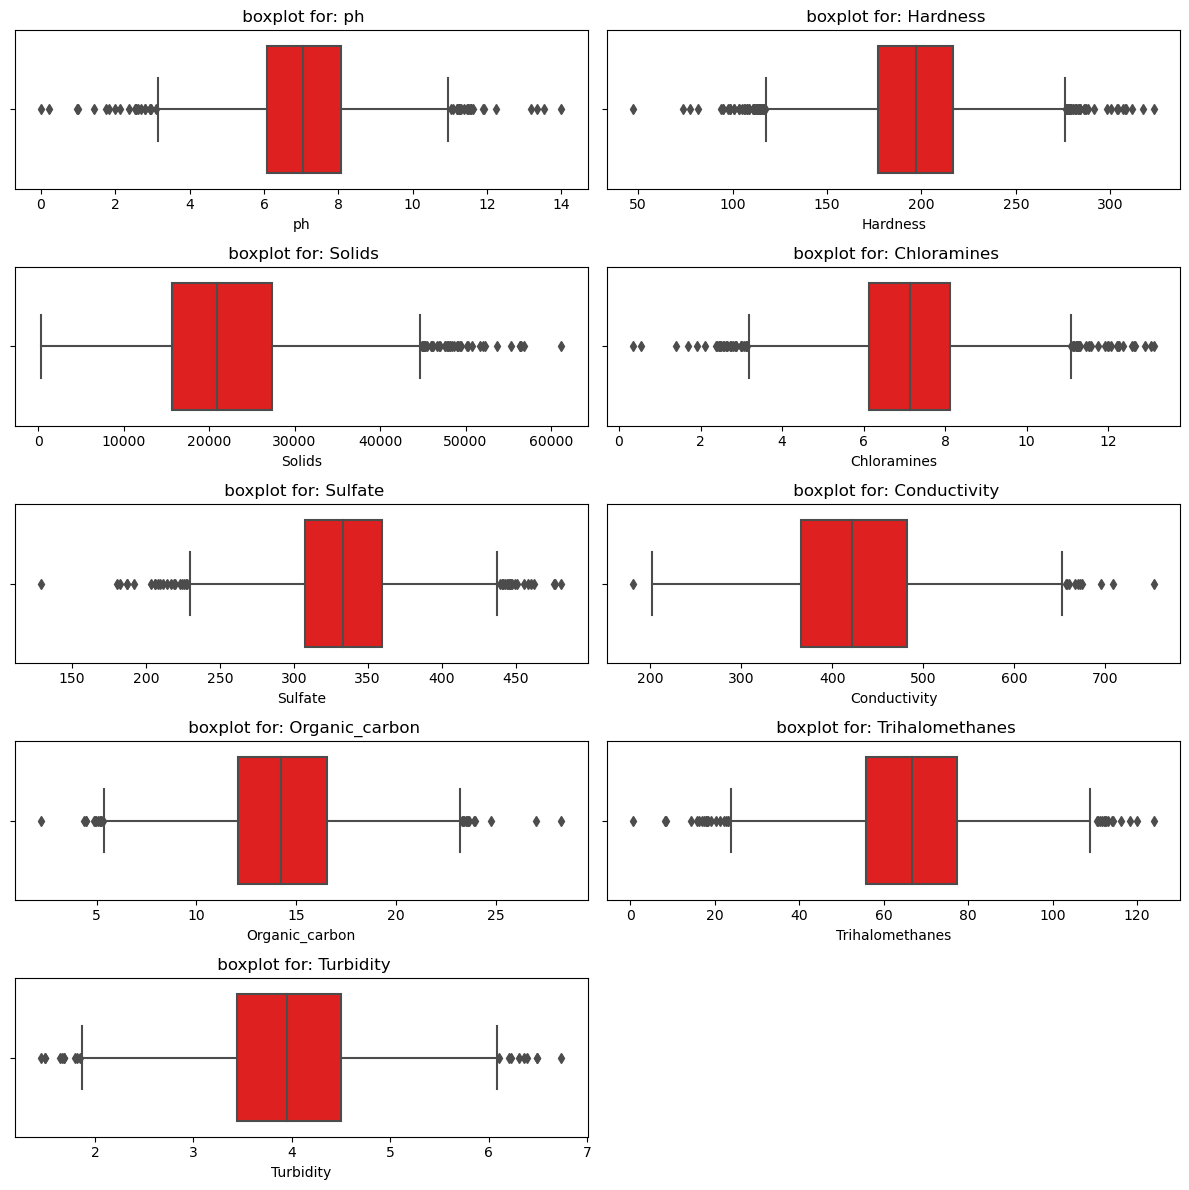

In [ ]:
no_rows = (len(dataf.columns) +1)// 2
no_cols_subplt = 2

plt.figure(figsize= (12,12), dpi = 100)
for index, cols in enumerate (dataf.iloc[:,:-1].columns):
    plt.subplot(no_rows,no_cols_subplt, index+1)
    sns.boxplot(x = dataf[cols], data = dataf, color = 'red')
    plt.title(f" boxplot for: {cols}")

plt.tight_layout()
plt.show()

- As the features 'ph','Sulfate', 'Trihalomethanes' have outliers we would be using median values to impute the missing values here

In [3]:
lst_cols_missingvals = ['ph','Sulfate', 'Trihalomethanes']

def impute_missingvals(lst_cols_missingvals):
    for i in lst_cols_missingvals:
        dataf[i] = dataf[i].fillna(dataf[i].median())


In [4]:
impute_missingvals(lst_cols_missingvals)

In [5]:
# check if null values still exist in the data
dataf.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
# check for duplicates again post imputation of values:
dataf.duplicated().sum()

0

# EDA

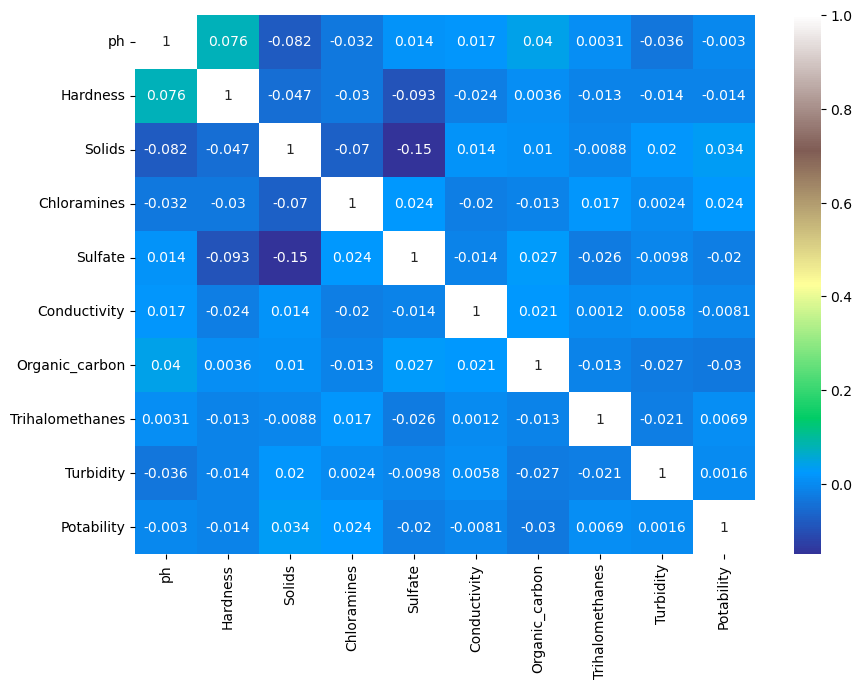

In [ ]:
plt.figure(figsize= (10,7), dpi = 100)

sns.heatmap(dataf.corr(), annot = True, cmap = 'terrain')
plt.show()

- There is no strong correlation between the fields so we would not remove any columns here

In [ ]:
dataf['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

- From the counts in the target column we can see that that data set is a balanced dataset

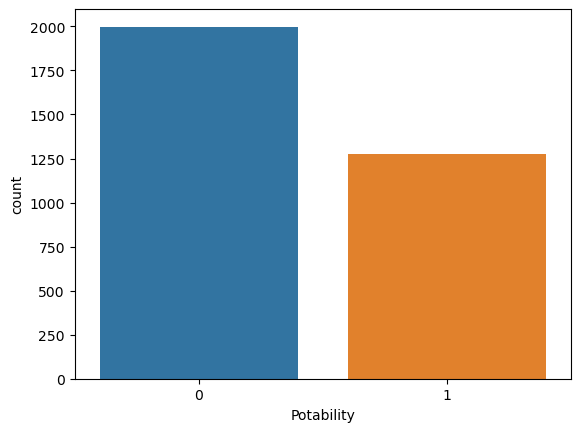

In [ ]:
sns.countplot(x= dataf['Potability'])
plt.show()

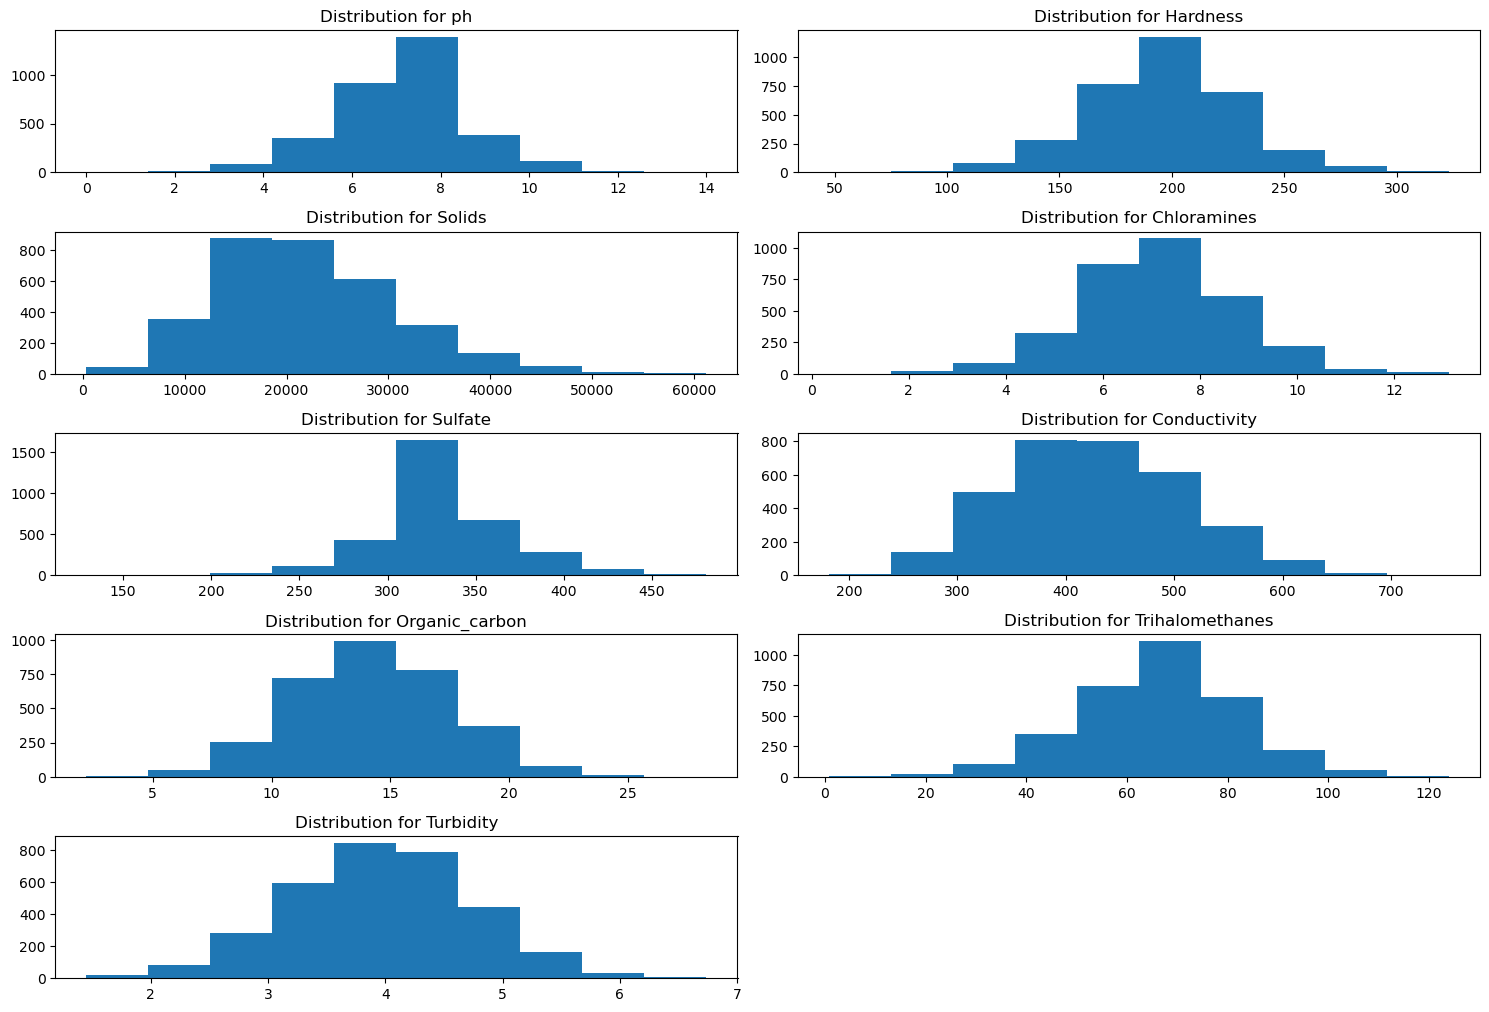

In [ ]:
# checking distribution of data

n_rows = len(dataf.columns) // 2 +1
n_cols = 2

index = len(dataf.columns[:-1])

plt.figure(figsize=(15,12), dpi = 100)
for index,cols in enumerate (dataf.iloc[:,:-1].columns):
    plt.subplot(n_rows,n_cols,index+1)
    plt.hist(x= cols, data = dataf)
    plt.title(f"Distribution for {cols}")

plt.tight_layout()
plt.show()


- From the histogram we can see that all the features have normal distribution

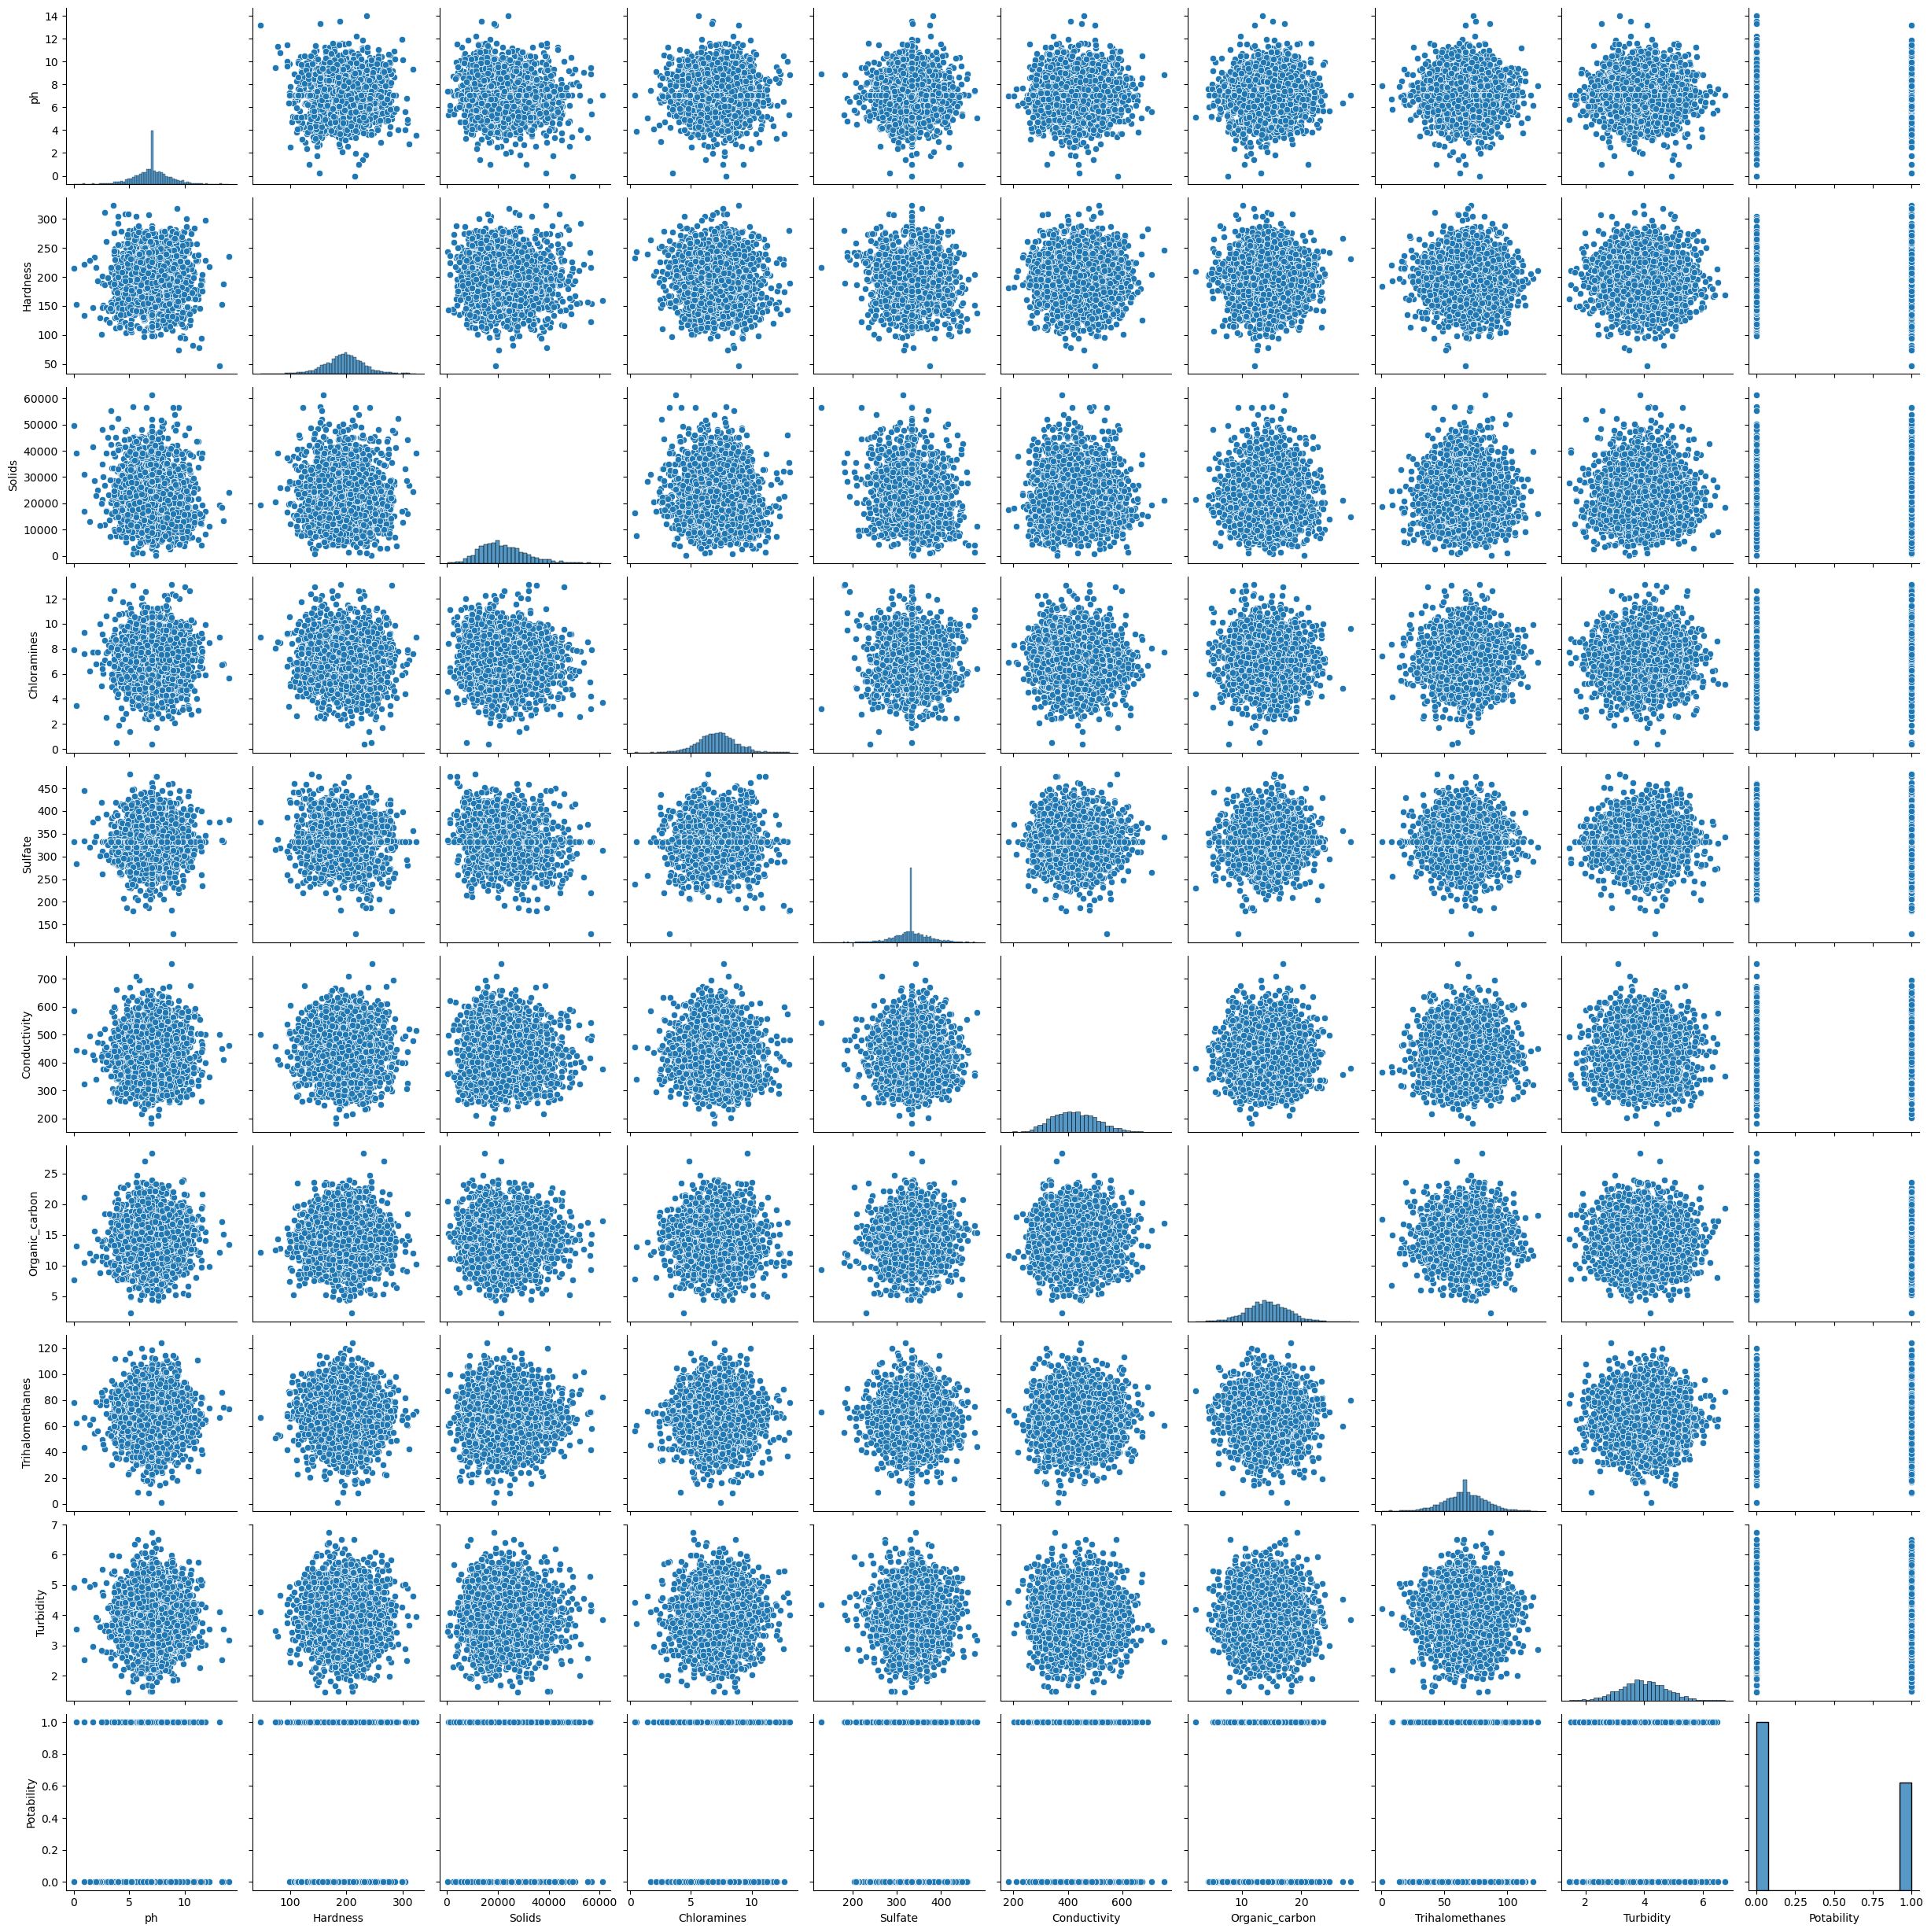

In [ ]:
sns.pairplot(dataf)
plt.show()

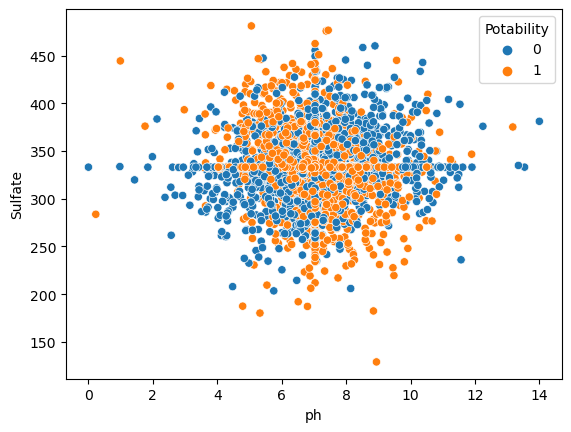

In [ ]:
sns.scatterplot(x= dataf['ph'], y =dataf['Sulfate'],hue = 'Potability', data = dataf)
plt.show()

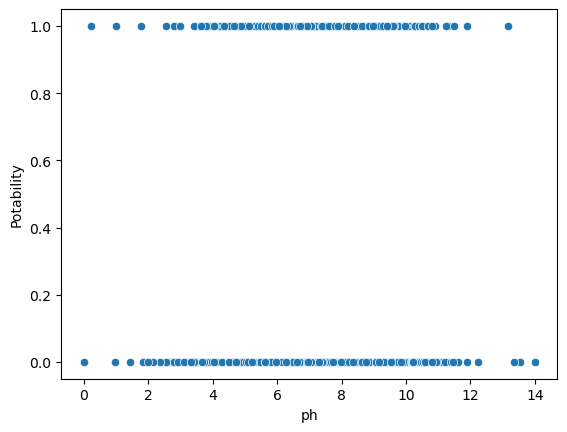

In [ ]:
sns.scatterplot(x= 'ph', y = 'Potability', data = dataf,hue = 'Potability')
plt.show()

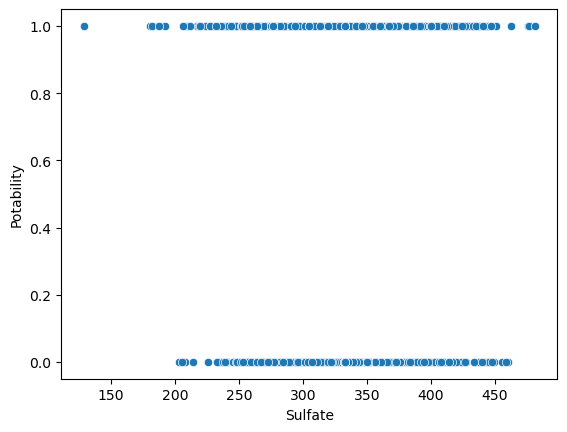

In [ ]:
sns.scatterplot(x= 'Sulfate', y = 'Potability', data = dataf)
plt.show()

In [7]:
dataf_bkp = dataf.copy()

# Splitting the data into independent and dependent variable

In [8]:
x = dataf.iloc[:,:-1]
x.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075

In [9]:
y = dataf.iloc[:,-1:]
y.head()

Potability
0           0
1           0
2           0
3           0
4           0

# Splitting data into Train and Test

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42, stratify = y)

# Applying feature scaling on the x data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc_x = StandardScaler()
x_train_sc = sc_x.fit_transform(x_train)
x_test_sc = sc_x.transform(x_test)

# Model Building

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

In [14]:
# List of models that we want to execute
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
         GradientBoostingClassifier(),XGBClassifier()]


In [15]:
# stored procedure that would execute all the models and generate the metrics for models
def model_build(models,x_train,x_test,y_train,y_test):
    # x_train,x_test,y_train,y_test = train_test_split(x_sam,y_sam,test_size = 0.25, random_state = 101 )
    x_train = x_train
    x_test = x_test
    y_train = y_train
    y_test = y_test

    model_dict = dict()

    model_name_lst = []
    train_acc = []
    test_acc = []
    train_cv = []
    test_cv = []

    auc_values = []

    TP_train_mat = []
    FP_train_mat = []
    FN_train_mat = []
    TN_train_mat = []

    TP_test_mat = []
    FP_test_mat = []
    FN_test_mat = []
    TN_test_mat = []


    for model in models:
        # below 2 lines of code to extract model name from the model class name
        model_name = str(model)
#         index = model_name.find('=')
        bracket = model_name.find('(')

        model_name = model_name[:bracket]



        model_obj = model
        model_obj.fit(x_train,y_train)
        y_pred_train = model_obj.predict(x_train)
        y_pred_test = model_obj.predict(x_test)

        accuracy_train = round(accuracy_score(y_train,y_pred_train)*100,2)
        accuracy_test = round(accuracy_score(y_test,y_pred_test)*100,2)
        cv_train = round((cross_val_score(model_obj,x_train,y_train, cv= 10)*100).mean(),2)
        cv_test = round((cross_val_score(model_obj,x_test,y_test,cv =10)*100).mean(),2)
#        model_dict[model] = accuracy_test
        fpr,tpr, threshold = roc_curve(y_test,y_pred_test)
        auc_val = auc(fpr,tpr)

        conf_mat_train = confusion_matrix(y_train,y_pred_train)
        conf_mat_test = (confusion_matrix(y_test,y_pred_test))

        TP_train = conf_mat_train[0][0]
        FP_train = conf_mat_train[0][1]
        FN_train = conf_mat_train[1][0]
        TN_train = conf_mat_train[1][1]

        TP_test = conf_mat_test[0][0]
        FP_test = conf_mat_test[0][1]
        FN_test = conf_mat_test[1][0]
        TN_test = conf_mat_test[1][1]

        print()
        print("###############"*8)
        print(f"Results for {model_name} model")
        print("###############"*8)
        print()
        print(f"Train accuracy for {model_name} model is : {accuracy_train}%" )
        print()
        print("****************"*5)
        print(f"Test accuracy for {model_name} model is : {accuracy_test}%" )
        print()
        print("****************"*5)
        print(f"Train data Confusion Matrix for {model_name} model")
        print()
        print(confusion_matrix(y_train,y_pred_train))
        print()
        print("****************"*5)
        print(f"Test data Confusion Matrix for {model_name} model")
        print()
        print(confusion_matrix(y_test,y_pred_test))
        print()
        print("****************"*5)
        print(f"Classification Report for Train data for {model_name} model")
        print()
        print(classification_report(y_train,y_pred_train))
        print()
        print("****************"*5)
        print(f"Classification Report for Test data for {model_name} model")
        print()
        print(classification_report(y_test,y_pred_test))
        print("****************"*5)
        print()
        print(f"Train Cross validation for {model_name} where cv = 10")
        print()
        print()
        print(f"Cross validation accuracy = {cv_train}")
        print()
        print("****************"*5)
        print()
        print(f"Test Cross validation for {model_name} cv = 10")
        print()
        print(f"Cross validation accuracy = {cv_test}")

        # Plotting the ROC AUC curve
        plt.figure(figsize=(5, 5), dpi=100)
        plt.title(f'ROC AUC CURVE for {model_name}')
        plt.plot(fpr, tpr, linestyle='-', label=f'{model_name} (auc = %0.3f)' % auc_val)


        plt.xlabel('False Positive Rate -->')
        plt.ylabel('True Positive Rate -->')

        plt.legend()

        plt.show()

        model_name_lst.append(model_name)
        train_acc.append(accuracy_train)
        test_acc.append(accuracy_test)
        train_cv.append(cv_train)
        test_cv.append(cv_train)
        auc_values.append(auc_val)

        TP_train_mat.append(TP_train)
        FP_train_mat.append(FP_train)
        FN_train_mat.append(FN_train)
        TN_train_mat.append(TN_train)

        TP_test_mat.append(TP_test)
        FP_test_mat.append(FP_test)
        FN_test_mat.append(FN_test)
        TN_test_mat.append(TN_test)



        model_dict['Model Name'] = model_name_lst
        model_dict['Train accuracy'] = train_acc
        model_dict['Test accuracy'] = test_acc
        model_dict['Train cross validation'] = train_cv
        model_dict['Test cross validation'] = test_cv
        model_dict['AUC'] = auc_values

        model_dict['TP train matrix'] = TP_train_mat
        model_dict['FP train matrix'] = FP_train_mat
        model_dict['FN train matrix'] = FN_train_mat
        model_dict['TN train matrix'] = TN_train_mat

        model_dict['TP test matrix'] = TP_test_mat
        model_dict['FP test matrix'] = FP_test_mat
        model_dict['FN test matrix'] = FN_test_mat
        model_dict['TN test matrix'] = TN_test_mat



    return(model_dict)


########################################################################################################################
Results for LogisticRegression model
########################################################################################################################

Train accuracy for LogisticRegression model is : 61.01%

********************************************************************************
Test accuracy for LogisticRegression model is : 60.93%

********************************************************************************
Train data Confusion Matrix for LogisticRegression model

[[1499    0]
 [ 958    0]]

********************************************************************************
Test data Confusion Matrix for LogisticRegression model

[[499   0]
 [320   0]]

********************************************************************************
Classification Report for Train data for LogisticRegression model

              precision    recall  f1-score   su

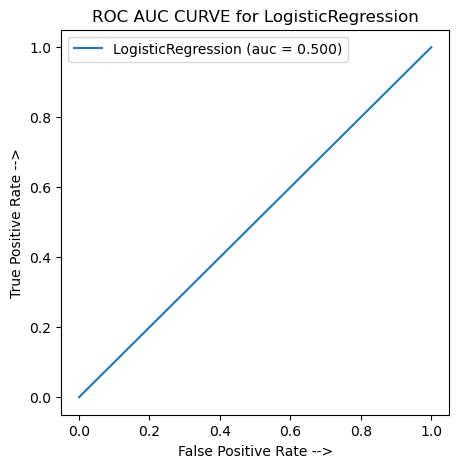


########################################################################################################################
Results for SVC model
########################################################################################################################

Train accuracy for SVC model is : 73.83%

********************************************************************************
Test accuracy for SVC model is : 67.28%

********************************************************************************
Train data Confusion Matrix for SVC model

[[1437   62]
 [ 581  377]]

********************************************************************************
Test data Confusion Matrix for SVC model

[[464  35]
 [233  87]]

********************************************************************************
Classification Report for Train data for SVC model

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      1499
           1       0.86      

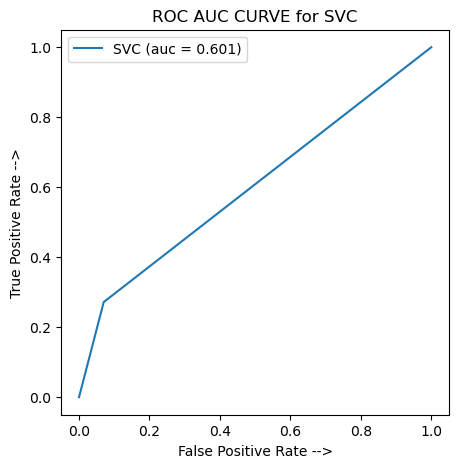


########################################################################################################################
Results for DecisionTreeClassifier model
########################################################################################################################

Train accuracy for DecisionTreeClassifier model is : 100.0%

********************************************************************************
Test accuracy for DecisionTreeClassifier model is : 56.53%

********************************************************************************
Train data Confusion Matrix for DecisionTreeClassifier model

[[1499    0]
 [   0  958]]

********************************************************************************
Test data Confusion Matrix for DecisionTreeClassifier model

[[315 184]
 [172 148]]

********************************************************************************
Classification Report for Train data for DecisionTreeClassifier model

              precision 

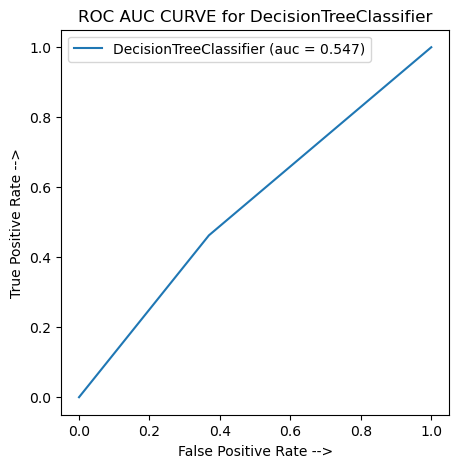


########################################################################################################################
Results for RandomForestClassifier model
########################################################################################################################

Train accuracy for RandomForestClassifier model is : 100.0%

********************************************************************************
Test accuracy for RandomForestClassifier model is : 64.84%

********************************************************************************
Train data Confusion Matrix for RandomForestClassifier model

[[1499    0]
 [   0  958]]

********************************************************************************
Test data Confusion Matrix for RandomForestClassifier model

[[436  63]
 [225  95]]

********************************************************************************
Classification Report for Train data for RandomForestClassifier model

              precision 

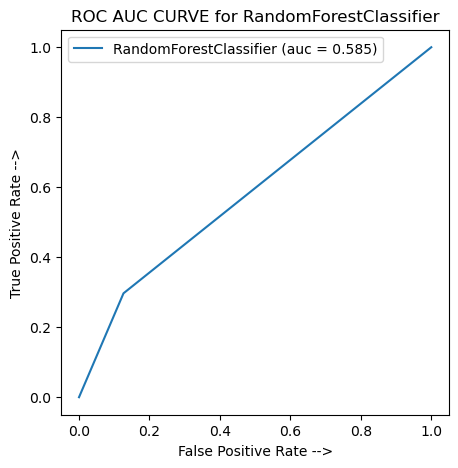


########################################################################################################################
Results for GradientBoostingClassifier model
########################################################################################################################

Train accuracy for GradientBoostingClassifier model is : 74.16%

********************************************************************************
Test accuracy for GradientBoostingClassifier model is : 66.18%

********************************************************************************
Train data Confusion Matrix for GradientBoostingClassifier model

[[1451   48]
 [ 587  371]]

********************************************************************************
Test data Confusion Matrix for GradientBoostingClassifier model

[[469  30]
 [247  73]]

********************************************************************************
Classification Report for Train data for GradientBoostingClassifier model



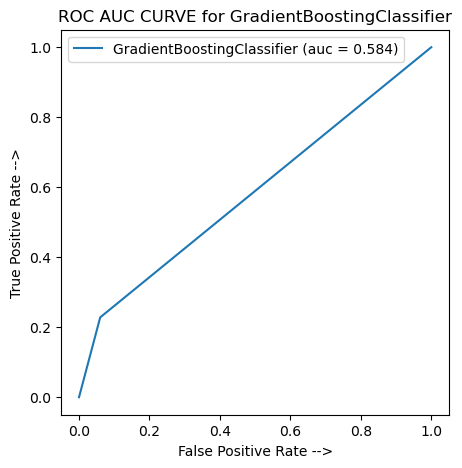


########################################################################################################################
Results for XGBClassifier model
########################################################################################################################

Train accuracy for XGBClassifier model is : 99.84%

********************************************************************************
Test accuracy for XGBClassifier model is : 63.0%

********************************************************************************
Train data Confusion Matrix for XGBClassifier model

[[1499    0]
 [   4  954]]

********************************************************************************
Test data Confusion Matrix for XGBClassifier model

[[389 110]
 [193 127]]

********************************************************************************
Classification Report for Train data for XGBClassifier model

              precision    recall  f1-score   support

           0       1.00 

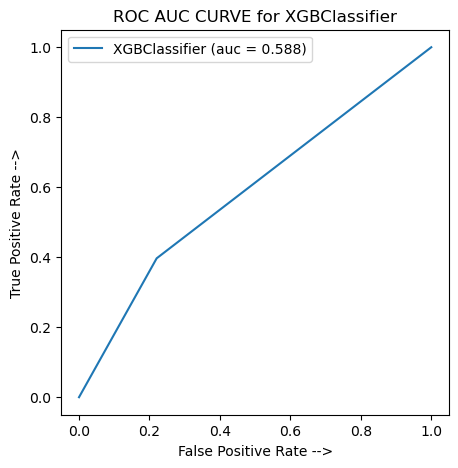

In [16]:
# calling the above model execution stored prcedure, we pass the x_train,x_test,y_train,y_test data and list of models
# as arguments
model_results = model_build(models,x_train_sc,x_test_sc,y_train,y_test)

# building K nearest neighbours model

In [17]:
# finding the best k value with least error rate

from sklearn.neighbors import KNeighborsClassifier 
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != np.array(y_test)))

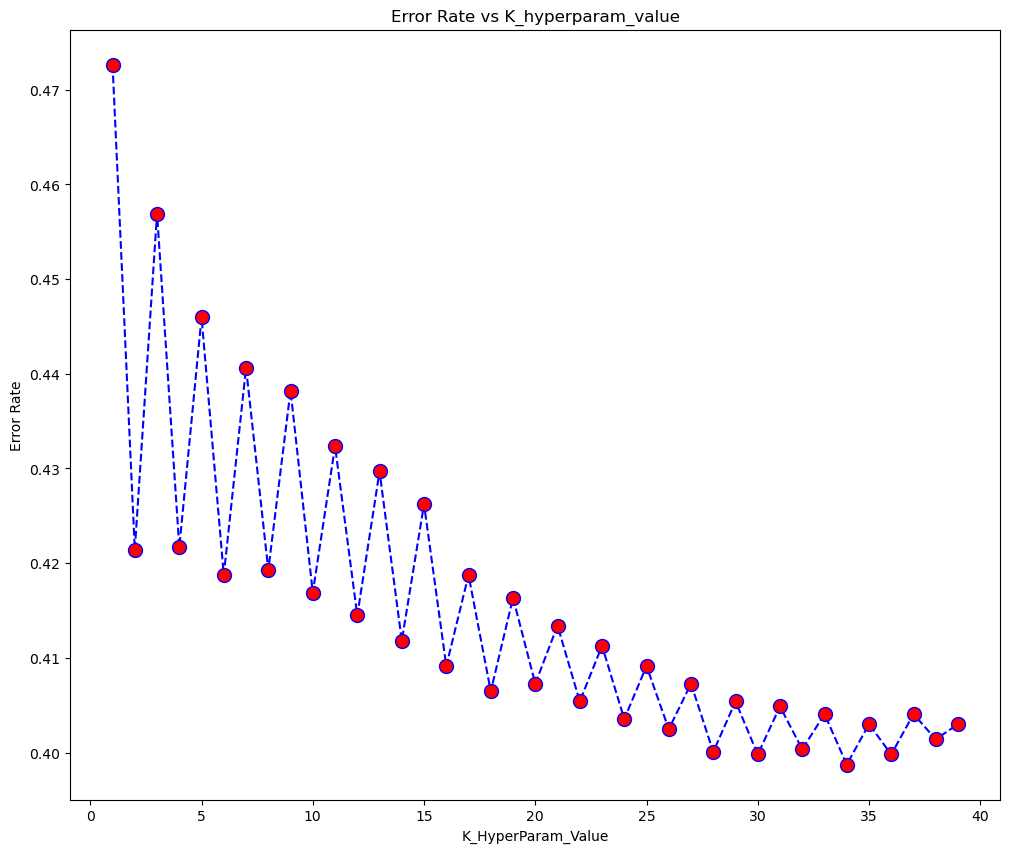

In [18]:
# ploting the above values 
plt.figure(figsize =(12,10), dpi = 100)

plt.plot(range(1,40),error_rate,color = 'blue', linestyle = 'dashed',marker = 'o', markerfacecolor = 'red', markersize = 10 )
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

- From the above plot graph we can see that when k = 38 there is least error so we choose k = 34 while building the model

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 34)
knn_model.fit(x_train,y_train)
y_pred_train_knn = knn_model.predict(x_train_sc)
y_pred_test_knn = knn_model.predict(x_test_sc)

In [23]:
print(f"Accuracy for Train data for K-Nearest neigbors: {accuracy_score(y_train,y_pred_train_knn)}")
print()
print("***********" * 5)
print()
print(f"Accuracy for Test data for K-Nearest neigbors:{accuracy_score(y_test,y_pred_test_knn)}")
print()
print("***********" * 5)
print(f"Train data Confusion Matrix for K-Nearest neigbors model")
print()
print(confusion_matrix(y_train,y_pred_train_knn))
print()
print("****************"*5)
print(f"Test data Confusion Matrix for K-Nearest neigbors  model")
print()
print(confusion_matrix(y_test,y_pred_test_knn))
print()
print("****************"*5)
print(f"Classification Report for Train data for K-Nearest neigbors model")
print()
print(classification_report(y_train,y_pred_train_knn))
print()
print("****************"*5)
print(f"Classification Report for Test data for K-Nearest neigbors model")
print()
print(classification_report(y_test,y_pred_test_knn))
print("****************"*5)
print()


Accuracy for Train data for K-Nearest neigbors: 0.6100936100936101

*******************************************************

Accuracy for Test data for K-Nearest neigbors:0.6092796092796092

*******************************************************
Train data Confusion Matrix for K-Nearest neigbors model

[[1499    0]
 [ 958    0]]

********************************************************************************
Test data Confusion Matrix for K-Nearest neigbors  model

[[499   0]
 [320   0]]

********************************************************************************
Classification Report for Train data for K-Nearest neigbors model

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1499
           1       0.00      0.00      0.00       958

    accuracy                           0.61      2457
   macro avg       0.31      0.50      0.38      2457
weighted avg       0.37      0.61      0.46      2457


****************************

# Hyperparameter Tuning for SVM model

In [39]:
model_sv = SVC()


In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [41]:
param_grid = {'C':[0.1,1,10,100],
             'kernel' : ['linear','sigmoid','poly','rbf'],
             'gamma': ['scale', 'auto'],
             'degree':[1,2,3,4,5,6] }

In [43]:
grid_search = GridSearchCV(estimator = model_sv, param_grid = param_grid,cv = 5,scoring = 'accuracy',
                                   verbose = 2,n_jobs =-1)


In [44]:
grid_search.fit(x_train_sc,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']},
             scoring='accuracy', verbose=2)

In [46]:
grid_search.best_params_

{'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [49]:
best_grid = grid_search.best_estimator_
best_grid

SVC(C=100, degree=2, gamma='auto', kernel='poly')

In [52]:
y_pred_train_poly = best_grid.predict(x_train_sc)
y_pred_test_poly= best_grid.predict(x_test_sc)

In [54]:
print("Training Accuracy - poly :", accuracy_score(y_train, y_pred_train_poly))
print("*************"*5)
print("Test Accuracy - poly :", accuracy_score(y_test, y_pred_test_poly))
print()
print("****************"*5)
print(f"Train data Confusion Matrix for SVM model")
print()
print(confusion_matrix(y_train, y_pred_train_poly))
print()
print("****************"*5)
print(f"Test data Confusion Matrix for SVM  model")
print()
print(confusion_matrix(y_test, y_pred_test_poly))
print()
print("****************"*5)
print(f"Classification Report for Train data for SVM model")
print()
print(classification_report(y_train, y_pred_train_poly))
print()
print("****************"*5)
print(f"Classification Report for Test data for SVM model")
print()
print(classification_report(y_test, y_pred_test_poly))
print("****************"*5)
print()


Training Accuracy - poly : 0.6768416768416768
*****************************************************************
Test Accuracy - poly : 0.6568986568986569

********************************************************************************
Train data Confusion Matrix for SVM model

[[1410   89]
 [ 705  253]]

********************************************************************************
Test data Confusion Matrix for SVM  model

[[469  30]
 [251  69]]

********************************************************************************
Classification Report for Train data for SVM model

              precision    recall  f1-score   support

           0       0.67      0.94      0.78      1499
           1       0.74      0.26      0.39       958

    accuracy                           0.68      2457
   macro avg       0.70      0.60      0.58      2457
weighted avg       0.70      0.68      0.63      2457


********************************************************************************
Cla

# Conclusion

- From all the models we can see that we are not getting good accuracy results, most the models are giving accuracy around 64 to 67%
- Of all the models only the SVM model was giving better results so we tried to hyperparamter tune it and check for improvement, however even that is not yielding more than 70% accuracy.
- What we can infer from this is the we may need some more data, this dataset size is less and may be the result for lower accuracy